In [15]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input as efnb0_preprocess


In [16]:
img_path = "D:/AIML/data/flower_photos/dandelion2.jpg"  # ◄ change this

In [17]:
# Cell 2: Load your trained model
# (Update the path if you saved it elsewhere)
model = tf.keras.models.load_model("D:/AIML/data/flower_photos/efnb0_flowers_head.h5")
model.summary()


Model: "efficientnetb0_flowers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 gap (GlobalAveragePooling2  (None, 1280)              0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 predictions (Dense)         (None, 5)                 6405      
                                                                 
Total params: 4055976 (15.47 MB)
Trainable p

In [18]:
# Cell 3: Define your class names
# Make sure this matches the order you trained on:
class_names = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]


In [19]:
# Cell 4: Helper to load & preprocess a single image
IMG_SIZE = (224, 224)  # matches the EfficientNetB0 input size

def load_and_prep_efnb0(img_path):
    # 1) Load & resize to IMG_SIZE
    img = load_img(img_path, target_size=IMG_SIZE)
    # 2) Convert to array (H, W, 3), dtype=float32, range [0–255]
    arr = img_to_array(img)
    # 3) EfficientNetB0 preprocessing (scale to [-1,1], etc.)
    arr = efnb0_preprocess(arr)
    # 4) Add batch dim => shape (1, H, W, 3)
    return np.expand_dims(arr, axis=0), img


In [20]:
# Cell 6: Run inference and visualize the prediction
# Replace img_path with your own file if desired
input_tensor, orig_img = load_and_prep_efnb0(img_path)

# Model prediction
probs    = model.predict(input_tensor)[0]
pred_idx = np.argmax(probs)
confidence = probs[pred_idx]
pred_class = class_names[pred_idx]

1/1 [==============================] - 1s 1s/step


Predicted: dandelion  (confidence 99.89%)


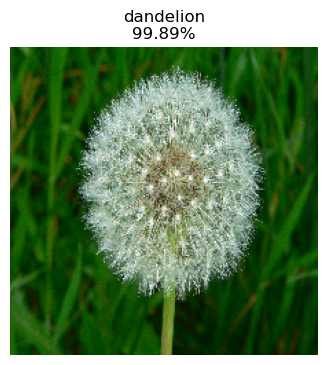

In [21]:
# Print result
print(f"Predicted: {pred_class}  (confidence {confidence:.2%})")

# Display image with title
plt.figure(figsize=(4,4))
plt.imshow(orig_img)
plt.axis("off")
plt.title(f"{pred_class}\n{confidence:.2%}")
plt.show()